In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_excel(r'C:\Users\91784\Downloads\dataset\SKILLINZA\train_fashion.xlsx')
test = pd.read_csv(r'C:\Users\91784\Downloads\dataset\SKILLINZA\test_fashion.csv')

In [6]:
train  = data.copy()

In [7]:
train.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [8]:
print (train.shape)
print (test.shape)

(75000, 14)
(25000, 13)


# #classification model which can predict whether the same type of order can be repeated by any customer or no chance that the same type of order cannot be repeated by any customer

In [9]:
train.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [10]:
train.dtypes

Order_Ref_Number                int64
Order_Placed_AT                object
Order_Delivered_Date           object
Product_Ref_ID                  int64
Size                           object
Color_Code                     object
Product_Category_Reference      int64
Cost_to_Customer(USD)         float64
Customer_ID                     int64
Gender                         object
Customer_BirthDate             object
Customer_Location              object
Customer_Joining_Date          object
Order_Repeat_Chance             int64
dtype: object

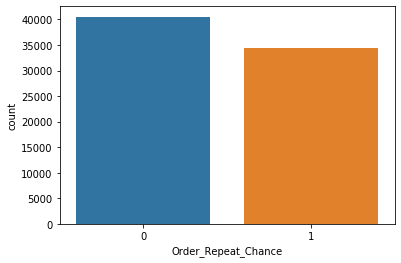

In [11]:
sns.countplot(train['Order_Repeat_Chance'])

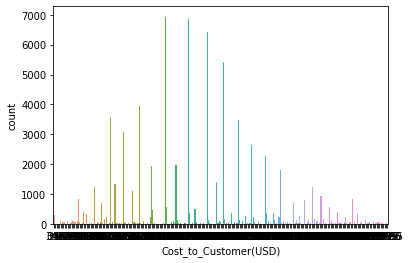

In [12]:
sns.countplot(train['Cost_to_Customer(USD)'])

In [13]:

#train[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]] = train[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]].apply(pd.to_datetime)   
#test_data[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]] = test_data[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]].apply(pd.to_datetime)            



In [15]:
train.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [16]:
train['Gender'].value_counts()

Mrs             71614
Mr               2903
Family            307
not reported       88
Company            88
Name: Gender, dtype: int64

In [17]:
test['Gender'].value_counts()

Mrs             23815
Mr               1012
Family            107
Company            40
not reported       26
Name: Gender, dtype: int64

In [18]:
train['Customer_Location'].value_counts()

North Rhine-Westphalia           17083
Lower Saxony                     11401
Bavaria                          10244
Baden-Wuerttemberg                8992
Hesse                             5689
Schleswig-Holstein                4126
Rhineland-Palatinate              3547
Berlin                            3079
Saxony                            2393
Hamburg                           1923
Brandenburg                       1677
Mecklenburg-Western Pomerania     1208
Thuringia                         1162
Bremen                             976
Saxony-Anhalt                      833
Saarland                           667
Name: Customer_Location, dtype: int64

In [19]:
test['Customer_Location'].value_counts()

North Rhine-Westphalia           5742
Lower Saxony                     3748
Bavaria                          3428
Baden-Wuerttemberg               2989
Hesse                            1897
Schleswig-Holstein               1405
Rhineland-Palatinate             1237
Berlin                           1014
Saxony                            754
Hamburg                           612
Brandenburg                       554
Mecklenburg-Western Pomerania     432
Thuringia                         388
Saxony-Anhalt                     289
Bremen                            282
Saarland                          229
Name: Customer_Location, dtype: int64

In [20]:
train.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [21]:
train.dtypes

Order_Ref_Number                int64
Order_Placed_AT                object
Order_Delivered_Date           object
Product_Ref_ID                  int64
Size                           object
Color_Code                     object
Product_Category_Reference      int64
Cost_to_Customer(USD)         float64
Customer_ID                     int64
Gender                         object
Customer_BirthDate             object
Customer_Location              object
Customer_Joining_Date          object
Order_Repeat_Chance             int64
dtype: object

#SIZE Feature contains symbols inorder to process remove the symbols in the values

In [197]:
train_base =train.copy()
test_data  = test.copy()

In [23]:
#batch1['Grouping'] = batch1['Wire Name'].str.extract('^[A-Z].*',expand=True)

In [ ]:
S = 35-37 = 36
M =  38-40 = 39
L  = 41-43  =  42
Xl =  44-47  =  45
XXL = 48-51  =  48
XXXL  =  52-55  =  53


# Based on SIZE Basic Measurment replace the string charater values in SIZE column

# Replace unsized string with 1 

In [198]:



# In[184]:

train_base['Size'] = train_base['Size'].replace(['xs'], '33')
train_base['Size'] = train_base['Size'].replace(['s'], '36')
train_base['Size'] = train_base['Size'].replace(['m'], '39')
train_base['Size'] = train_base['Size'].replace(['l'], '42')
train_base['Size'] = train_base['Size'].replace(['xl'], '45')
train_base['Size'] = train_base['Size'].replace(['xxl'], '48')
train_base['Size'] = train_base['Size'].replace(['xxxl'], '53')
train_base['Size'] = train_base['Size'].replace(['unsized'], '50')
test_data['Size'] = test_data['Size'].replace(['xs'], '36')
test_data['Size'] = test_data['Size'].replace(['s'], '33')
test_data['Size'] = test_data['Size'].replace(['m'], '39')
test_data['Size'] = test_data['Size'].replace(['l'], '42')
test_data['Size'] = test_data['Size'].replace(['xl'], '45')
test_data['Size'] = test_data['Size'].replace(['xxl'], '48')
test_data['Size'] = test_data['Size'].replace(['xxxl'], '53')
test_data['Size'] = test_data['Size'].replace(['unsized'], '50')


In [179]:
train_base.isnull().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [199]:
#train['Size'] = train['Size'].str.extract(r'(\d+)', expand=False)

#train_base['Size'] = train_base['Size'].apply(pd.to_numeric, errors='coerce')

#test_data['Size'] = test_data['Size'].apply(pd.to_numeric, errors='coerce')

train_base.Size = train_base.Size.str.replace('[#,@,&,+]', '')

test_data.Size = test_data.Size.str.replace('[#,@,&,+]', '')


In [167]:
#train_base['Size'].fillna(int(train_base['Size'].mean()), inplace=True)

In [200]:
train_base['Size'] = train_base['Size'].apply(pd.to_numeric)
test_data['Size'] = test_data['Size'].apply(pd.to_numeric)

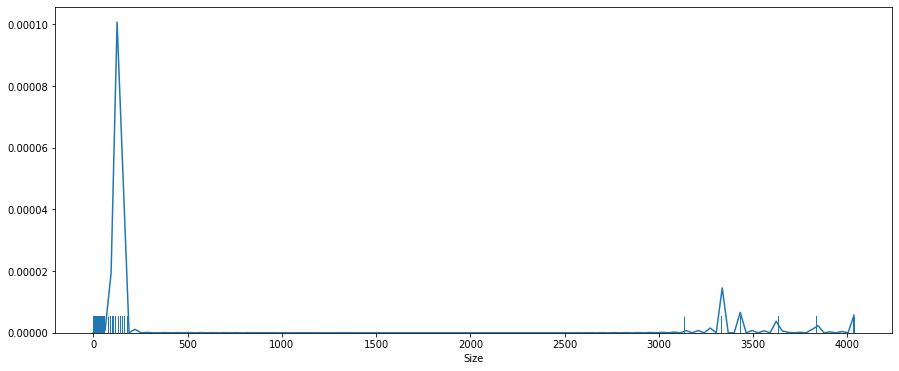

In [169]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.distplot(train_base['Size'],rug=True, hist=False)

From the Plot we can say Most of products having size below 100

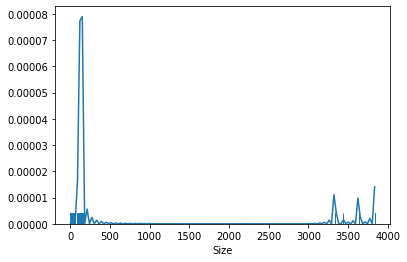

In [52]:
sns.distplot(test_data['Size'],rug=True, hist=False)

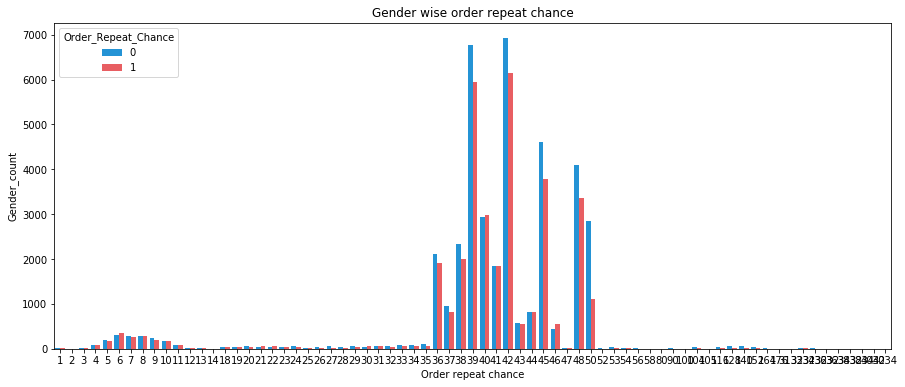

In [182]:
plt.figure(figsize=(15,6))
sns.countplot(x='Size', data=train_base, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Gender wise order repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Gender_count')
# plt.savefig('./plots/performance_count.png')
plt.show()

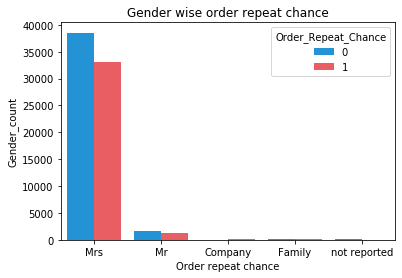

In [53]:
sns.countplot(x='Gender', data=train_base, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Gender wise order repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Gender_count')
# plt.savefig('./plots/performance_count.png')
plt.show()

#  From above digram we can conclude that Most of the users gender MRS (Female) Female Customers are interseted to repeat the order as well as Buying the Products

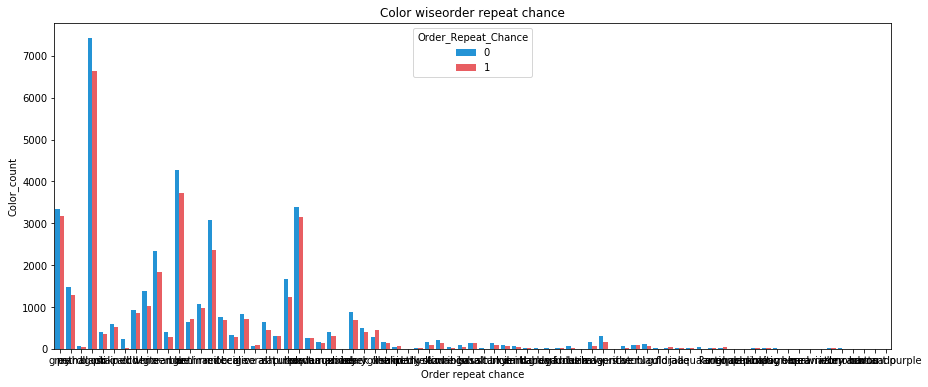

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x='Color_Code', data=train_base, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Color wiseorder repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Color_count')
# plt.savefig('./plots/performance_count.png')
plt.show()

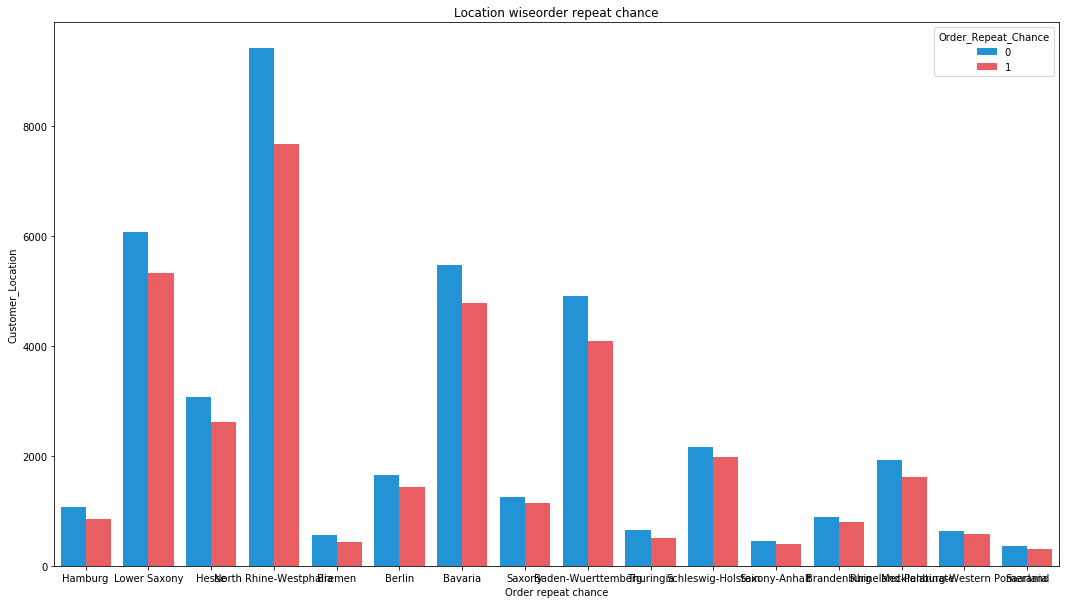

In [228]:
plt.figure(figsize=(18,10))
sns.countplot(x='Customer_Location', data=train_base, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Location wiseorder repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Customer_Location')
# plt.savefig('./plots/performance_count.png')
plt.show()

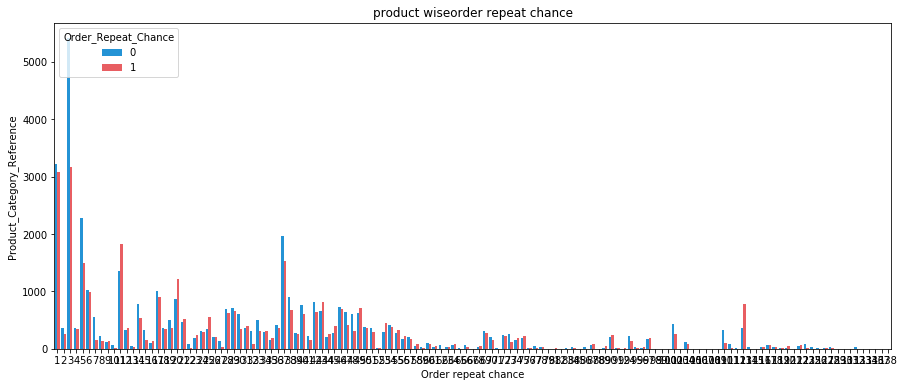

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x='Product_Category_Reference', data=train_base, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("product wiseorder repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Product_Category_Reference')
# plt.savefig('./plots/performance_count.png')
plt.show()

In [ ]:
train_base.head()

In [57]:
train_base['Size'].describe()

count    75000.000000
mean        41.275227
std        106.242908
min          1.000000
25%         38.000000
50%         40.000000
75%         44.000000
max       4034.000000
Name: Size, dtype: float64

In [58]:
train_base.dtypes

Order_Ref_Number                int64
Order_Placed_AT                object
Order_Delivered_Date           object
Product_Ref_ID                  int64
Size                            int64
Color_Code                     object
Product_Category_Reference      int64
Cost_to_Customer(USD)         float64
Customer_ID                     int64
Gender                         object
Customer_BirthDate             object
Customer_Location              object
Customer_Joining_Date          object
Order_Repeat_Chance             int64
dtype: object

# BASE MODEL WITH NUMERIC FEATURES 

In [184]:
# Dropping irrelevant columns



train_base.drop(['Order_Ref_Number', 'Order_Placed_AT', 'Order_Delivered_Date',
       'Customer_ID', 'Customer_BirthDate','Customer_Joining_Date','Color_Code','Customer_Location'], axis=1, inplace=True)


In [185]:
train_base.head()

,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Gender,Order_Repeat_Chance
0,897,42,33,19.9,Mrs,0
1,1557,45,31,89.9,Mrs,1
2,292,4,4,64.9,Mrs,0
3,1445,48,29,59.9,Mrs,0
4,1415,39,3,21.9,Mrs,0


In [141]:
#pd.get_dummies(train_base, prefix=['Color_Code', 'Gender','Customer_Location'])

#train_base['Size'] = train_base['Size'].apply(pd.to_numeric, errors='coerce')

train_base.dtypes

Size                            int64
Product_Category_Reference      int64
Cost_to_Customer(USD)         float64
Gender                         object
Order_Repeat_Chance             int64
dtype: object

In [186]:
train_base = pd.get_dummies(train_base, columns=['Gender'])

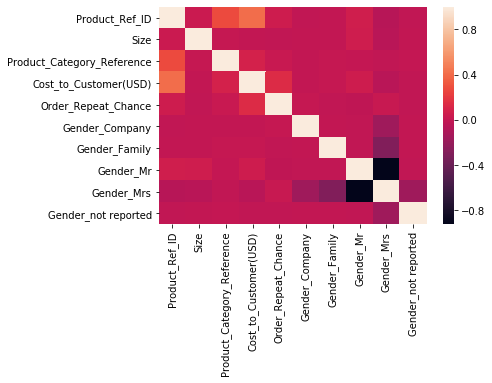

In [187]:
#correlation plot
corr = train_base.corr()
sns.heatmap(corr)

In [188]:
print (corr['Order_Repeat_Chance'].sort_values(ascending=False)[:30], '\n') #top 15 values
print ('----------------------')
print (corr['Order_Repeat_Chance'].sort_values(ascending=False)[-5:]) #last 5 values

Order_Repeat_Chance           1.000000
Cost_to_Customer(USD)         0.140703
Product_Ref_ID                0.051865
Product_Category_Reference    0.024788
Gender_Mrs                    0.016922
Gender_Company                0.015259
Size                         -0.009616
Gender_not reported          -0.010530
Gender_Family                -0.010559
Gender_Mr                    -0.015559
Name: Order_Repeat_Chance, dtype: float64 

----------------------
Gender_Company         0.015259
Size                  -0.009616
Gender_not reported   -0.010530
Gender_Family         -0.010559
Gender_Mr             -0.015559
Name: Order_Repeat_Chance, dtype: float64


# No correlation between target variable and dependent variable

#BASE MODEL

In [189]:
X = train_base.drop(['Order_Repeat_Chance'], axis=1)
y = train_base['Order_Repeat_Chance']

In [190]:

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [191]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [68]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}

# Building model
logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=Tru

In [69]:
logreg_grid_val_score = grid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.5640698412698413
Best Params: {'C': 0.3, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


# Without any feature Enginnering using numeric fetures getting 55% accuracy it's good

#Decision Tress MOdel

In [192]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

In [193]:

y_pred = model.predict(X_test)

In [194]:

accuracy_score(y_test, y_pred, normalize=False)

13813

In [195]:
confusion_matrix(y_test, y_pred)


array([[8213, 4064],
       [4623, 5600]], dtype=int64)

In [196]:

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.5794701986754967

#While Using DT based model getting good accuracy on model so while go further we can stick with XGboost Model

In [105]:
train_base.head()

,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Order_Repeat_Chance,Gender_Company,Gender_Family,Gender_Mr,Gender_Mrs,Gender_not reported
0,897,42,33,19.9,0,0,0,0,1,0
1,1557,45,31,89.9,1,0,0,0,1,0
2,292,4,4,64.9,0,0,0,0,1,0
3,1445,48,29,59.9,0,0,0,0,1,0
4,1415,39,3,21.9,0,0,0,0,1,0


# While converting strings into numeric in Size Feature we are simply replace the UNSIZED string with  1 so we can check further processing based on other columns

In [201]:
train_df = train_base.copy()
test_df = test_data.copy()

In [205]:

train_df[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]] = train_df[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]].apply(pd.to_datetime)   
test_df[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]] = test_df[["Order_Placed_AT", "Order_Delivered_Date", "Customer_BirthDate"]].apply(pd.to_datetime)            


In [212]:
#df['C'] = (df['B'] - df['A']).dt.days

train_df['Order_delivered_Time'] = (train_df['Order_Delivered_Date']- train_df['Order_Placed_AT']).dt.days
test_df['Order_delivered_Time'] = (test_df['Order_Delivered_Date']-test_df['Order_Placed_AT']).dt.days

In [213]:
train_df.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance,Order_delivered_Time
0,98981,2016-09-10,2016-09-11,897,42,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0,1.0
1,69825,2016-08-15,2016-08-20,1557,45,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1,5.0
2,9929,2016-06-27,2016-07-02,292,4,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0,5.0
3,75600,2016-08-21,2016-08-22,1445,48,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0,1.0
4,95622,2016-09-06,2016-09-07,1415,39,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0,1.0


In [214]:
train_df.dtypes

Order_Ref_Number                       int64
Order_Placed_AT               datetime64[ns]
Order_Delivered_Date          datetime64[ns]
Product_Ref_ID                         int64
Size                                   int64
Color_Code                            object
Product_Category_Reference             int64
Cost_to_Customer(USD)                float64
Customer_ID                            int64
Gender                                object
Customer_BirthDate            datetime64[ns]
Customer_Location                     object
Customer_Joining_Date                 object
Order_Repeat_Chance                    int64
Order_delivered_Time                 float64
dtype: object

In [215]:
train_df['Order_delivered_Time'] = train_df['Order_delivered_Time'].apply(pd.to_numeric)
test_df['Order_delivered_Time'] =  test_df['Order_delivered_Time'].apply(pd.to_numeric)

In [233]:
train_df.dtypes

Order_Ref_Number                       int64
Order_Placed_AT               datetime64[ns]
Order_Delivered_Date          datetime64[ns]
Product_Ref_ID                         int64
Size                                 float64
Color_Code                            object
Product_Category_Reference             int64
Cost_to_Customer(USD)                float64
Customer_ID                            int64
Gender                                object
Customer_BirthDate            datetime64[ns]
Customer_Location                     object
Customer_Joining_Date                 object
Order_Repeat_Chance                    int64
Order_delivered_Time                 float64
dtype: object

In [219]:
#sub2['income'] = sub2['income'].fillna((sub2['income'].mean()))


train_df['Order_delivered_Time'] = train_df['Order_delivered_Time'].fillna((train_df['Order_delivered_Time'].mean()))
test_df['Order_delivered_Time'] =  test_df['Order_delivered_Time'].fillna((test_df['Order_delivered_Time'].mean()))

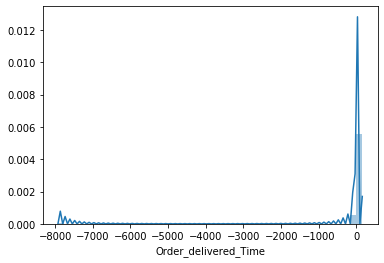

In [220]:
sns.distplot(train_df['Order_delivered_Time'])

In [221]:
train_df['Order_delivered_Time'].value_counts()

 2.000000       14219
 3.000000       12768
 1.000000       12472
 4.000000        9395
-85.402801       7021
 5.000000        3777
 6.000000        1171
 7.000000         879
 8.000000         694
 9.000000         641
 11.000000        591
 10.000000        555
 12.000000        479
 13.000000        440
 19.000000        440
 14.000000        415
 21.000000        413
 17.000000        399
 18.000000        379
 20.000000        376
 15.000000        368
 16.000000        343
 22.000000        277
 23.000000        272
 0.000000         263
 24.000000        234
 25.000000        204
 26.000000        188
 28.000000        174
 30.000000        163
                ...  
-7845.000000        3
 112.000000         3
-7920.000000        3
-7915.000000        3
-7918.000000        3
 122.000000         2
-7899.000000        2
 135.000000         2
 113.000000         2
-7909.000000        2
-7907.000000        2
-7922.000000        2
 114.000000         2
-7858.000000        2
 110.00000

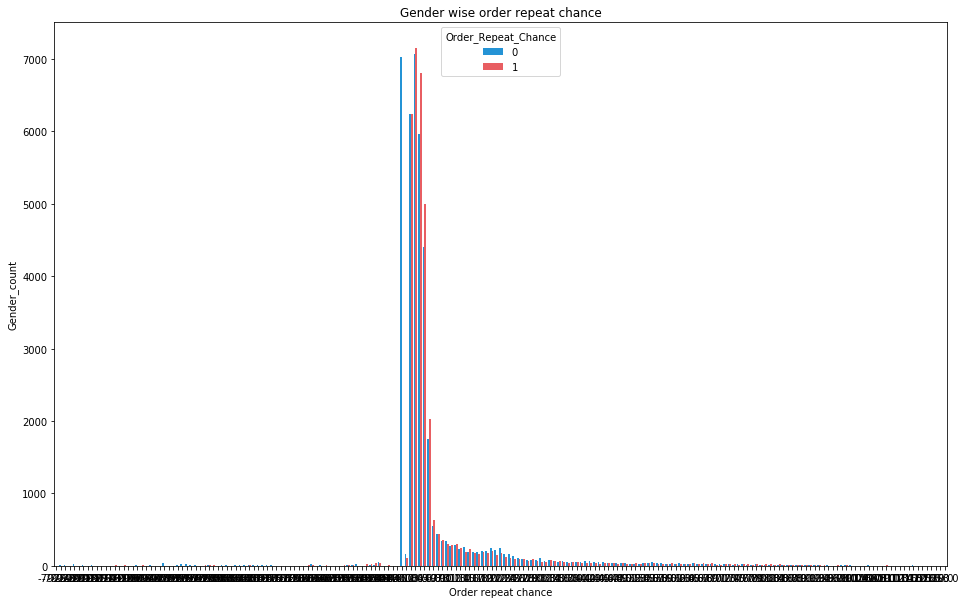

In [223]:
plt.figure(figsize=(16,10))
sns.countplot(x='Order_delivered_Time', data=train_df, hue='Order_Repeat_Chance', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Gender wise order repeat chance")
plt.xlabel('Order repeat chance')
plt.ylabel('Gender_count')
# plt.savefig('./plots/performance_count.png')
plt.show()

In [224]:
train_df['Customer_Location'].value_counts()

North Rhine-Westphalia           17083
Lower Saxony                     11401
Bavaria                          10244
Baden-Wuerttemberg                8992
Hesse                             5689
Schleswig-Holstein                4126
Rhineland-Palatinate              3547
Berlin                            3079
Saxony                            2393
Hamburg                           1923
Brandenburg                       1677
Mecklenburg-Western Pomerania     1208
Thuringia                         1162
Bremen                             976
Saxony-Anhalt                      833
Saarland                           667
Name: Customer_Location, dtype: int64

In [234]:
train_df.Size = train_df.Size.astype(int)

#All the states belong to German Country 

In [237]:
train_df.columns

Index(['Order_Ref_Number', 'Order_Placed_AT', 'Order_Delivered_Date',
       'Product_Ref_ID', 'Size', 'Color_Code', 'Product_Category_Reference',
       'Cost_to_Customer(USD)', 'Customer_ID', 'Gender', 'Customer_BirthDate',
       'Customer_Location', 'Customer_Joining_Date', 'Order_Repeat_Chance',
       'Order_delivered_Time'],
      dtype='object')

## One-Hot Encoding categorical features

In [238]:
train_df = pd.get_dummies(train_df, columns=['Gender','Customer_Location','Color_Code'])

test_df = pd.get_dummies(test_df, columns=['Gender','Customer_Location','Color_Code'])

In [239]:
train_df.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Customer_BirthDate,Customer_Joining_Date,...,Color_Code_pink,Color_Code_purple,Color_Code_red,Color_Code_silver,Color_Code_stained,Color_Code_striped,Color_Code_terracotta,Color_Code_turquoise,Color_Code_white,Color_Code_yellow
0,98981,2016-09-10,2016-09-11,897,42,33,19.9,48040,1960-05-30,2015-02-17,...,0,0,0,0,0,0,0,0,0,0
1,69825,2016-08-15,2016-08-20,1557,45,31,89.9,42892,1958-09-23,2015-11-14,...,0,0,0,0,0,0,0,0,0,0
2,9929,2016-06-27,2016-07-02,292,4,4,64.9,32479,1961-09-19,2016-06-28,...,0,0,0,0,0,0,0,0,0,0
3,75600,2016-08-21,2016-08-22,1445,48,29,59.9,4216,1952-10-01,2015-02-17,...,0,0,0,0,0,0,0,0,0,0
4,95622,2016-09-06,2016-09-07,1415,39,3,21.9,39571,1963-10-30,2015-10-02,...,0,0,0,0,0,0,0,0,0,0


In [240]:

train_df.drop(['Order_Ref_Number', 'Order_Placed_AT', 'Order_Delivered_Date',
       'Customer_ID', 'Customer_BirthDate','Customer_Joining_Date'], axis=1, inplace=True)

In [253]:
y = train_df['Order_Repeat_Chance']

In [254]:
X =  train_df.drop(['Order_Repeat_Chance','Color_Code_opal'],axis =1)

In [255]:
X.shape

(75000, 102)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [257]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    scale_pos_weight=1,
                    seed=27).fit(X_train,y_train)

In [259]:
y_pred = model.predict(X_test)


In [260]:

confusion_matrix(y_test, y_pred)

array([[7611, 4666],
       [3462, 6761]], dtype=int64)

In [261]:
accuracy_score(y_test, y_pred, normalize=False)

14372

#while Adding New features like Color_Code ,Location effects on Accuracy 

In [248]:
test_df.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Customer_BirthDate,Customer_Joining_Date,...,Color_Code_pink,Color_Code_purple,Color_Code_red,Color_Code_silver,Color_Code_stained,Color_Code_striped,Color_Code_terracotta,Color_Code_turquoise,Color_Code_white,Color_Code_yellow
0,75722,2016-08-20,2016-08-23,1745,13,64,75.0,43916,1975-01-31,2016-08-21,...,0,0,0,0,0,0,0,0,0,0
1,80185,2016-08-24,2016-08-28,1806,50,110,16.9,44684,1969-12-10,2015-02-17,...,0,0,0,0,0,0,0,0,0,0
2,19865,2016-06-30,2016-08-02,22,42,14,19.9,34106,1968-01-18,2015-02-17,...,0,0,0,0,0,0,0,0,0,0
3,76700,2016-08-21,2016-08-24,1683,42,97,39.9,34160,1961-03-31,2016-03-03,...,0,0,0,0,0,0,0,0,0,0
4,92992,2016-09-04,2016-09-06,1500,42,11,69.9,11929,1962-06-02,2016-04-23,...,0,0,0,0,0,0,0,0,0,0


In [249]:
test_df.drop(['Order_Ref_Number', 'Order_Placed_AT', 'Order_Delivered_Date',
       'Customer_ID', 'Customer_BirthDate','Customer_Joining_Date'], axis=1, inplace=True)

In [250]:
test_df.head()

,Product_Ref_ID,Size,Product_Category_Reference,Cost_to_Customer(USD),Order_delivered_Time,Gender_Company,Gender_Family,Gender_Mr,Gender_Mrs,Gender_not reported,...,Color_Code_pink,Color_Code_purple,Color_Code_red,Color_Code_silver,Color_Code_stained,Color_Code_striped,Color_Code_terracotta,Color_Code_turquoise,Color_Code_white,Color_Code_yellow
0,1745,13,64,75.0,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1806,50,110,16.9,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,22,42,14,19.9,33.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1683,42,97,39.9,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1500,42,11,69.9,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
#test_data['Size'] = test_data['Size'].apply(pd.to_numeric, errors='coerce')
#test_data['Size'].fillna(int(test_data['Size'].mean()), inplace=True)

In [155]:
#test_data = pd.get_dummies(test_data, columns=['Gender'])

In [156]:
#scaler = StandardScaler()

#X_test_data = scaler.fit_transform(test_data)

In [262]:
y_pred_x  = model.predict(test_df)

In [263]:
sub = pd.read_csv(r'C:\Users\91784\Downloads\dataset\SKILLINZA\Sub.csv')

In [264]:
sub.shape

(25000, 2)

In [265]:
sub.head()

,Order_Ref_Number,Order_Repeat_Chance
0,75722,2
1,80185,0
2,19865,1
3,76700,1
4,92992,2


In [266]:
sub['Order_Repeat_Chance'] = y_pred_x

In [267]:
sub.to_csv(r'C:\Users\91784\Downloads\dataset\SKILLINZA\Sub3.csv',index = False)

In [163]:
sub['Order_Repeat_Chance'].value_counts()

0    17523
1     7477
Name: Order_Repeat_Chance, dtype: int64

In [268]:
sub['Order_Repeat_Chance'].value_counts()

1    12519
0    12481
Name: Order_Repeat_Chance, dtype: int64